# **ML Project: PAPER 2**

**Introduction:**

Objective: reproducing the results of Paper 2.

Dataset Overview: Telco-Customer-Churn dataset 

Machine Learning Techniques: Random Forest, XGBoost, SVM, GBM.

Structure: 1. Business understanding 2. Data understanding 3. Data cleaning 4. Modeling & Evaluation.

----

# **Business Understanding** 

Customer churn is a significant problem in the telecom industry, and predicting it accurately is crucial for companies to take proactive measures to retain customers. Machine learning techniques have shown promise in improving the accuracy of churn prediction models.

## Problem Statement:

Customer churn poses a significant challenge, as it demands a deep understanding of customer behaviors and preferences. Traditional statistical approaches often struggle with large datasets and the intricate relationships among various factors, leading to limitations in their effectiveness. To enhance the accuracy of churn prediction models, there's a growing need to explore more sophisticated machine learning techniques that can better capture these complexities and provide valuable insights.

## Goals

<ol>
    <li> Develop a machine learning-based predictive model that can accurately identify customers at risk of churning. </li>
    <li> Compare the performance of different machine learning algorithms in predicting customer churn. </li>
</ol>

----

# **Data Understanding**

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



----



## Dataset

We first combined the datasets

In [5]:
train_df = pd.read_csv(r'C:\Users\Nassi\Desktop\ML Project\ML_Project_Files\archive (2)\churn-bigml-80.csv')
test_df = pd.read_csv(r'C:\Users\Nassi\Desktop\ML Project\ML_Project_Files\archive (2)\churn-bigml-20.csv')

combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)


# Display the combined DataFrame
print("\nCombined Dataset Shape:", combined_df.shape)



Combined Dataset Shape: (3333, 20)


In [6]:
combined_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# Describe the columns
print("Dataset Description:")
print(combined_df.describe(include='all'))

Dataset Description:
       State  Account length    Area code International plan Voice mail plan  \
count   3333     3333.000000  3333.000000               3333            3333   
unique    51             NaN          NaN                  2               2   
top       WV             NaN          NaN                 No              No   
freq     106             NaN          NaN               3010            2411   
mean     NaN      101.064806   437.182418                NaN             NaN   
std      NaN       39.822106    42.371290                NaN             NaN   
min      NaN        1.000000   408.000000                NaN             NaN   
25%      NaN       74.000000   408.000000                NaN             NaN   
50%      NaN      101.000000   415.000000                NaN             NaN   
75%      NaN      127.000000   510.000000                NaN             NaN   
max      NaN      243.000000   510.000000                NaN             NaN   

        Number vma

In [8]:
# Note the target variable
target_variable = 'Churn'
print(f"\nTarget Variable: {target_variable}")


Target Variable: Churn


### Exploratory Data Analysis (EDA)

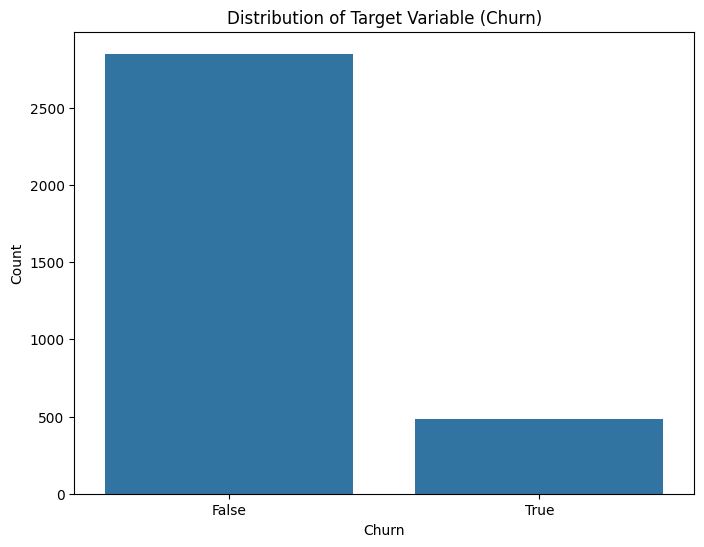

In [9]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=combined_df)
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

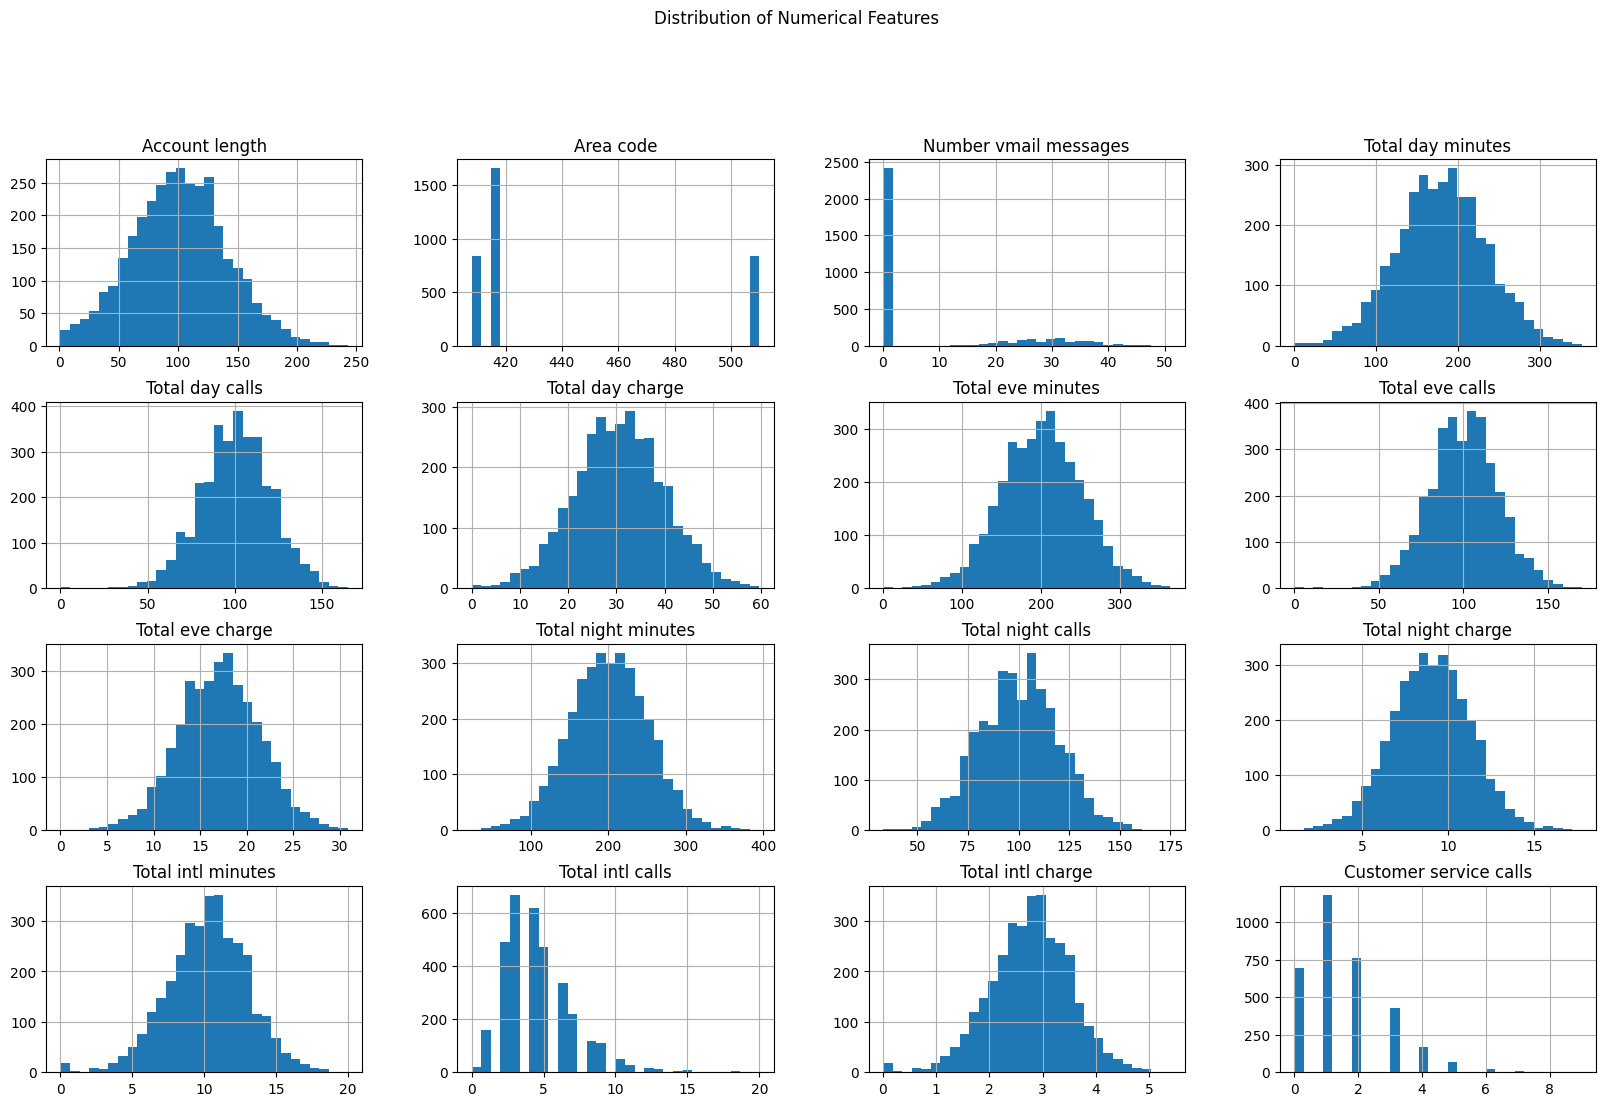

In [10]:
# Distribution of numerical features
numeric_features = combined_df.select_dtypes(include=[np.number]).columns.tolist()
combined_df[numeric_features].hist(figsize=(20, 15), bins=30, layout=(5, 4))
plt.suptitle('Distribution of Numerical Features')
plt.show()

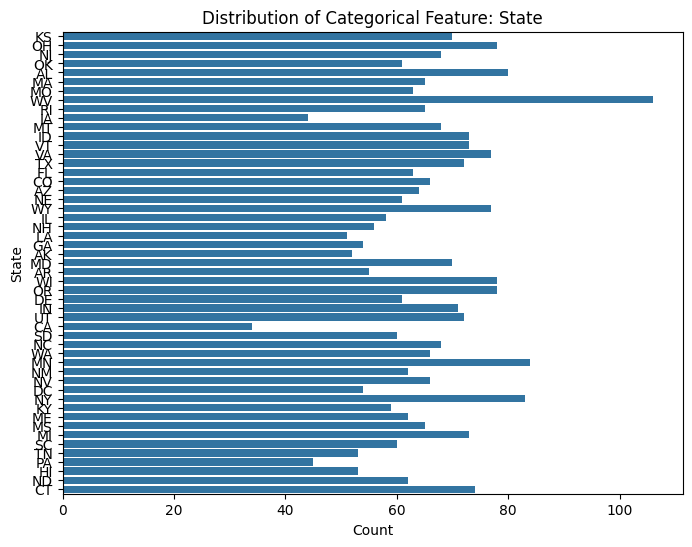

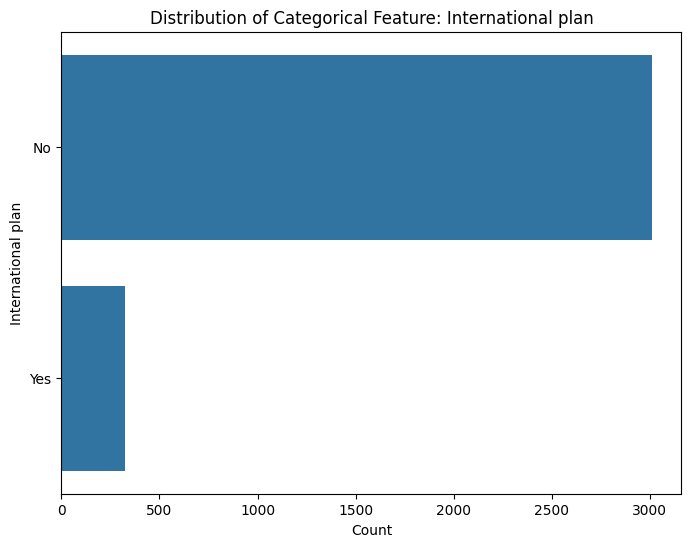

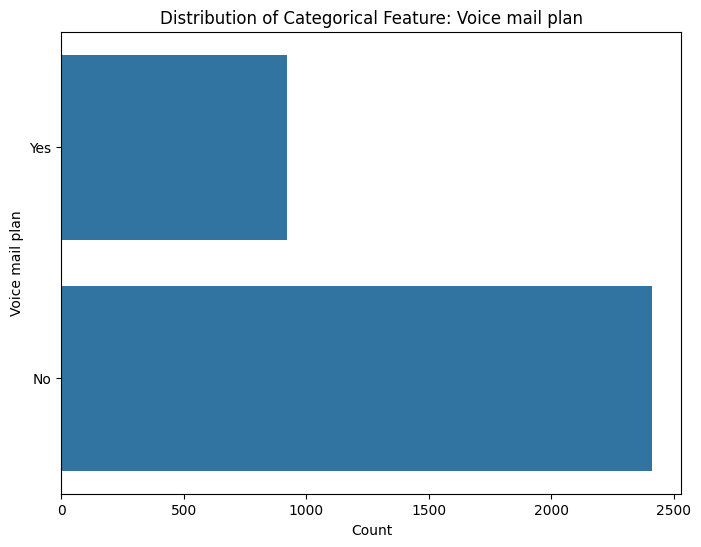

In [11]:
# Distribution of categorical features
categorical_features = combined_df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=combined_df)
    plt.title(f'Distribution of Categorical Feature: {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()




----

# **Data Cleaning**


## Missing values

In [12]:
#Check for missing values
print("Missing values in dataset:\n", combined_df.isnull().sum())

Missing values in dataset:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


***No Missing values found***

## Data Types

In [13]:
#Check for inconsistent data types or values
print("\nData types in the dataset:\n", combined_df.dtypes)


Data types in the dataset:
 State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


## Treating Outliers

Outliers Summary Before Handling:
                        Outlier Count  Percentage
Account length                   18.0    0.540054
Area code                         0.0    0.000000
Number vmail messages             1.0    0.030003
Total day minutes                25.0    0.750075
Total day calls                  23.0    0.690069
Total day charge                 25.0    0.750075
Total eve minutes                24.0    0.720072
Total eve calls                  20.0    0.600060
Total eve charge                 24.0    0.720072
Total night minutes              30.0    0.900090
Total night calls                22.0    0.660066
Total night charge               30.0    0.900090
Total intl minutes               46.0    1.380138
Total intl calls                 78.0    2.340234
Total intl charge                49.0    1.470147
Customer service calls          267.0    8.010801


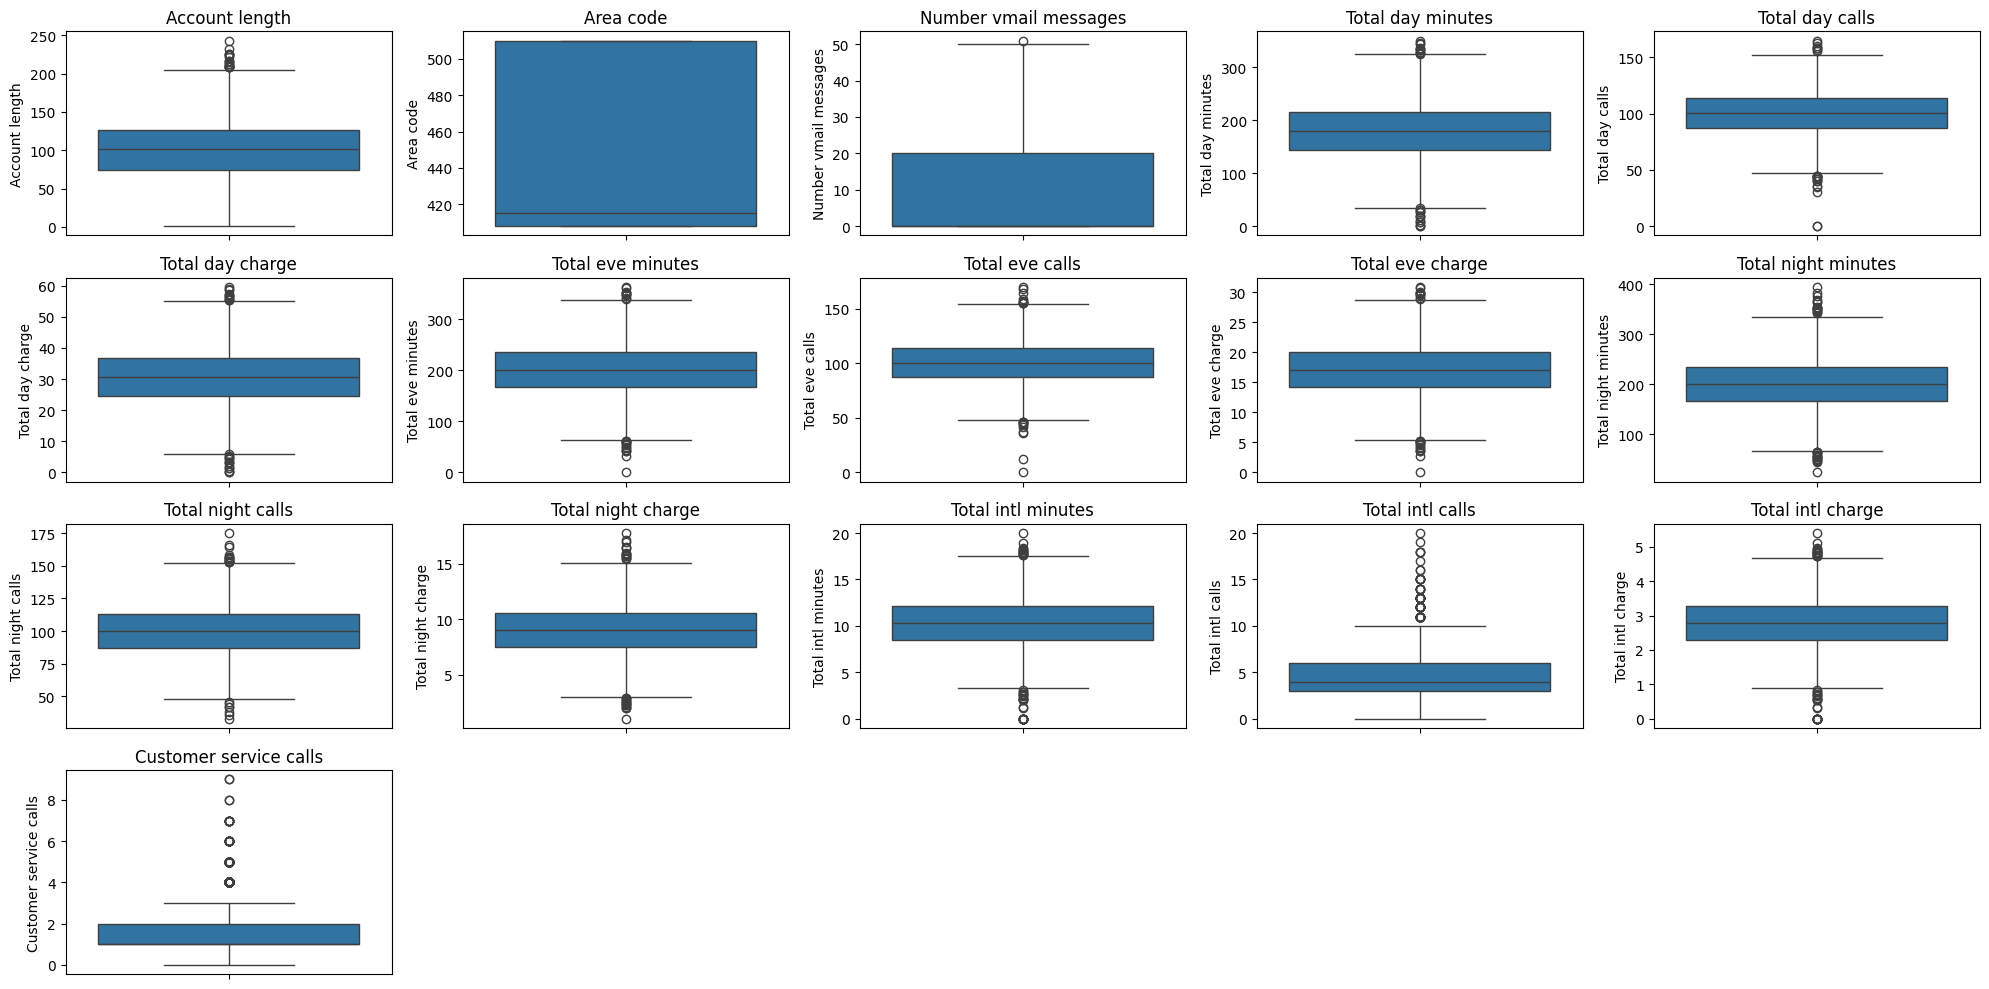

In [14]:
# Function to identify outliers using IQR
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify numeric columns (excluding 'International plan')
numeric_cols = combined_df.select_dtypes(include=np.number).columns.tolist()


# View outliers before handling
total_rows = combined_df.shape[0]
outliers_info = {}

# Check outliers for each numeric column
for col in numeric_cols:
    outliers = find_outliers(combined_df, col)
    outlier_count = outliers.shape[0]
    percentage = (outlier_count / total_rows) * 100
    outliers_info[col] = {"count": outlier_count, "percentage": percentage}

# Display summary of outliers
outliers_summary = pd.DataFrame(outliers_info).T
outliers_summary.columns = ["Outlier Count", "Percentage"]
print("Outliers Summary Before Handling:")
print(outliers_summary)

# Visualize outliers before handling (only continuous variables)
plt.figure(figsize=(20, 10))

# Plot boxplots for numeric columns (continuous data)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=combined_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [15]:
columns_to_remove_outliers = []
for col, info in outliers_info.items():
    if info["percentage"] < 5:
        columns_to_remove_outliers.append(col)

print("\nColumns to remove outliers from (less than 5% outliers):", columns_to_remove_outliers)


Columns to remove outliers from (less than 5% outliers): ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge']


In [16]:
def remove_outliers(df):
    df_cleaned = df.copy()
    for col in columns_to_remove_outliers:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

combined_df_cleaned = remove_outliers(combined_df)

Customer service calls has 8% of its values as outliers, we will replace them with with the median

In [17]:
# Impute outliers in 'Customer service calls'
Q1 = combined_df_cleaned['Customer service calls'].quantile(0.25)
Q3 = combined_df_cleaned['Customer service calls'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median_value = combined_df_cleaned['Customer service calls'].median()
combined_df_cleaned.loc[
    (combined_df_cleaned['Customer service calls'] < lower_bound)
    | (combined_df_cleaned['Customer service calls'] > upper_bound),
    'Customer service calls',
] = median_value


Total Rows Before Outlier Removal: 3333
Total Rows After Outlier Removal: 3053
Outliers Removed: 280 (8.40%)


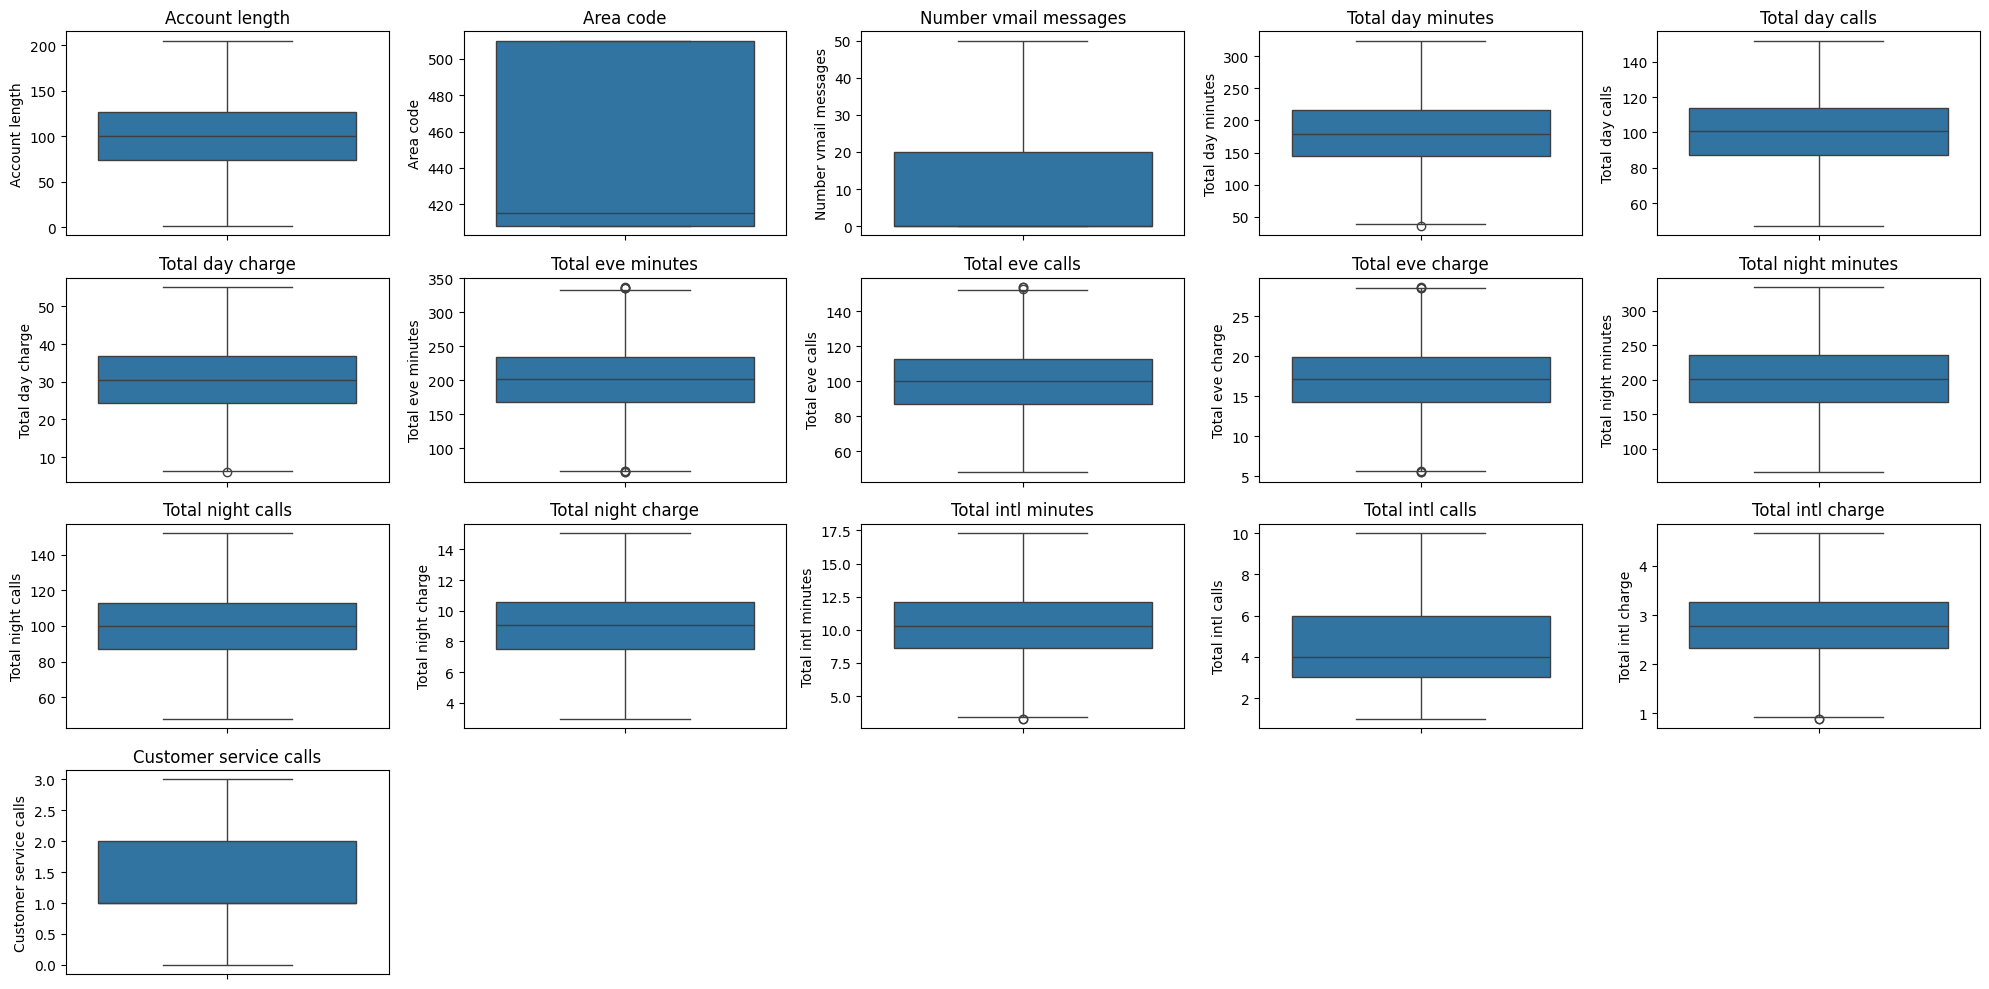

In [18]:
# View outliers after handling
total_rows_cleaned = combined_df_cleaned.shape[0]
outliers_removed = total_rows - total_rows_cleaned
percentage_removed = (outliers_removed / total_rows) * 100

print(f"\nTotal Rows Before Outlier Removal: {total_rows}")
print(f"Total Rows After Outlier Removal: {total_rows_cleaned}")
print(f"Outliers Removed: {outliers_removed} ({percentage_removed:.2f}%)")

# Visualize data after removing outliers (only continuous variables)
plt.figure(figsize=(20, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=combined_df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Encoding

In [19]:
# 3. Encoding Categorical Variables
# Encode 'International plan', 'Voice mail plan' and 'churn'
label_encoder = LabelEncoder()
combined_df_cleaned['International plan'] = label_encoder.fit_transform(combined_df_cleaned['International plan'])
combined_df_cleaned['Voice mail plan'] = label_encoder.fit_transform(combined_df_cleaned['Voice mail plan'])
combined_df_cleaned['Churn'] = label_encoder.fit_transform(combined_df_cleaned['Churn'])



In [20]:
combined_df_cleaned = pd.get_dummies(combined_df_cleaned, columns=['State'], prefix='State')

# Convert all State columns to integers
state_columns = [col for col in combined_df_cleaned.columns if col.startswith('State_')]
combined_df_cleaned[state_columns] = combined_df_cleaned[state_columns].astype(int)

print(combined_df_cleaned.dtypes)  # Check data types to ensure they are integers
combined_df_cleaned.head()  # Verify the output


Account length           int64
Area code                int64
International plan       int64
Voice mail plan          int64
Number vmail messages    int64
                         ...  
State_VT                 int64
State_WA                 int64
State_WI                 int64
State_WV                 int64
State_WY                 int64
Length: 70, dtype: object


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
5,118,510,1,0,0,223.4,98,37.98,220.6,101,...,0,0,0,0,0,0,0,0,0,0


## Correlation

### correlation with target variable

Correlation with target (Churn):
Churn                     1.000000
International plan        0.251840
Total day minutes         0.186933
Total day charge          0.186928
Total eve minutes         0.079951
                            ...   
State_VA                 -0.035369
Customer service calls   -0.043391
Total intl calls         -0.075953
Number vmail messages    -0.083501
Voice mail plan          -0.095121
Name: Churn, Length: 70, dtype: float64


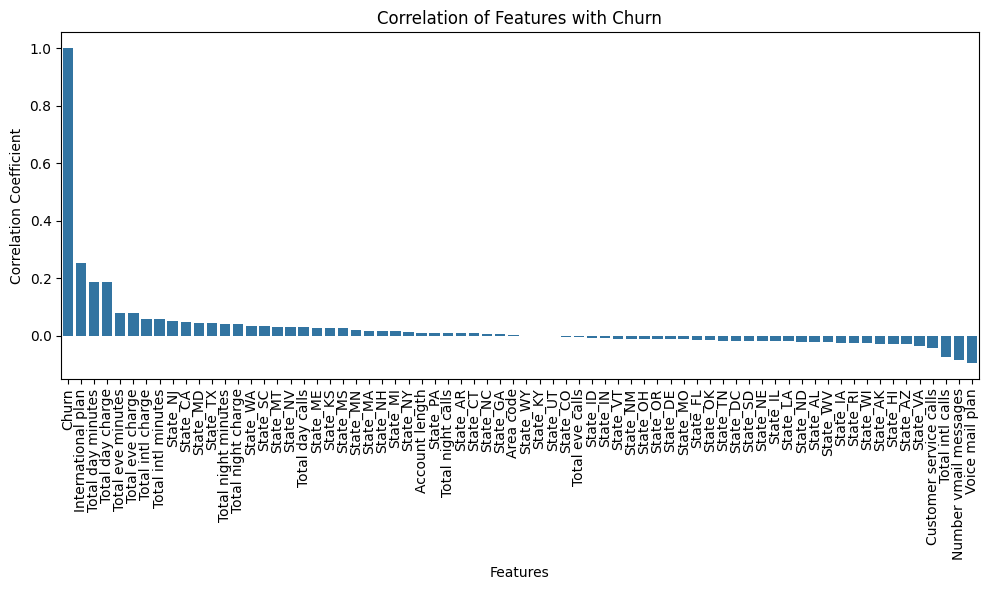

Features with low correlation (below 0.03): ['State_NV', 'Total day calls', 'State_ME', 'State_KS', 'State_MS', 'State_MN', 'State_MA', 'State_NH', 'State_MI', 'State_NY', 'Account length', 'State_PA', 'Total night calls', 'State_AR', 'State_CT', 'State_NC', 'State_GA', 'Area code', 'State_WY', 'State_KY', 'State_UT', 'State_CO', 'Total eve calls', 'State_ID', 'State_IN', 'State_VT', 'State_NM', 'State_OH', 'State_OR', 'State_DE', 'State_MO', 'State_FL', 'State_OK', 'State_TN', 'State_DC', 'State_SD', 'State_NE', 'State_IL', 'State_LA', 'State_ND', 'State_AL', 'State_WV', 'State_IA', 'State_RI', 'State_WI', 'State_AK', 'State_HI']


In [21]:

# 4. Correlation Analysis
correlation_with_target = combined_df_cleaned.corr()['Churn'].sort_values(ascending=False)
print("Correlation with target (Churn):")
print(correlation_with_target)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Drop low-correlation features
threshold = 0.03
least_correlated_features = correlation_with_target[abs(correlation_with_target) < threshold].index.tolist()
print(f"Features with low correlation (below {threshold}): {least_correlated_features}")
combined_df_cleaned = combined_df_cleaned.drop(columns=least_correlated_features)


### correlation between all varaibles

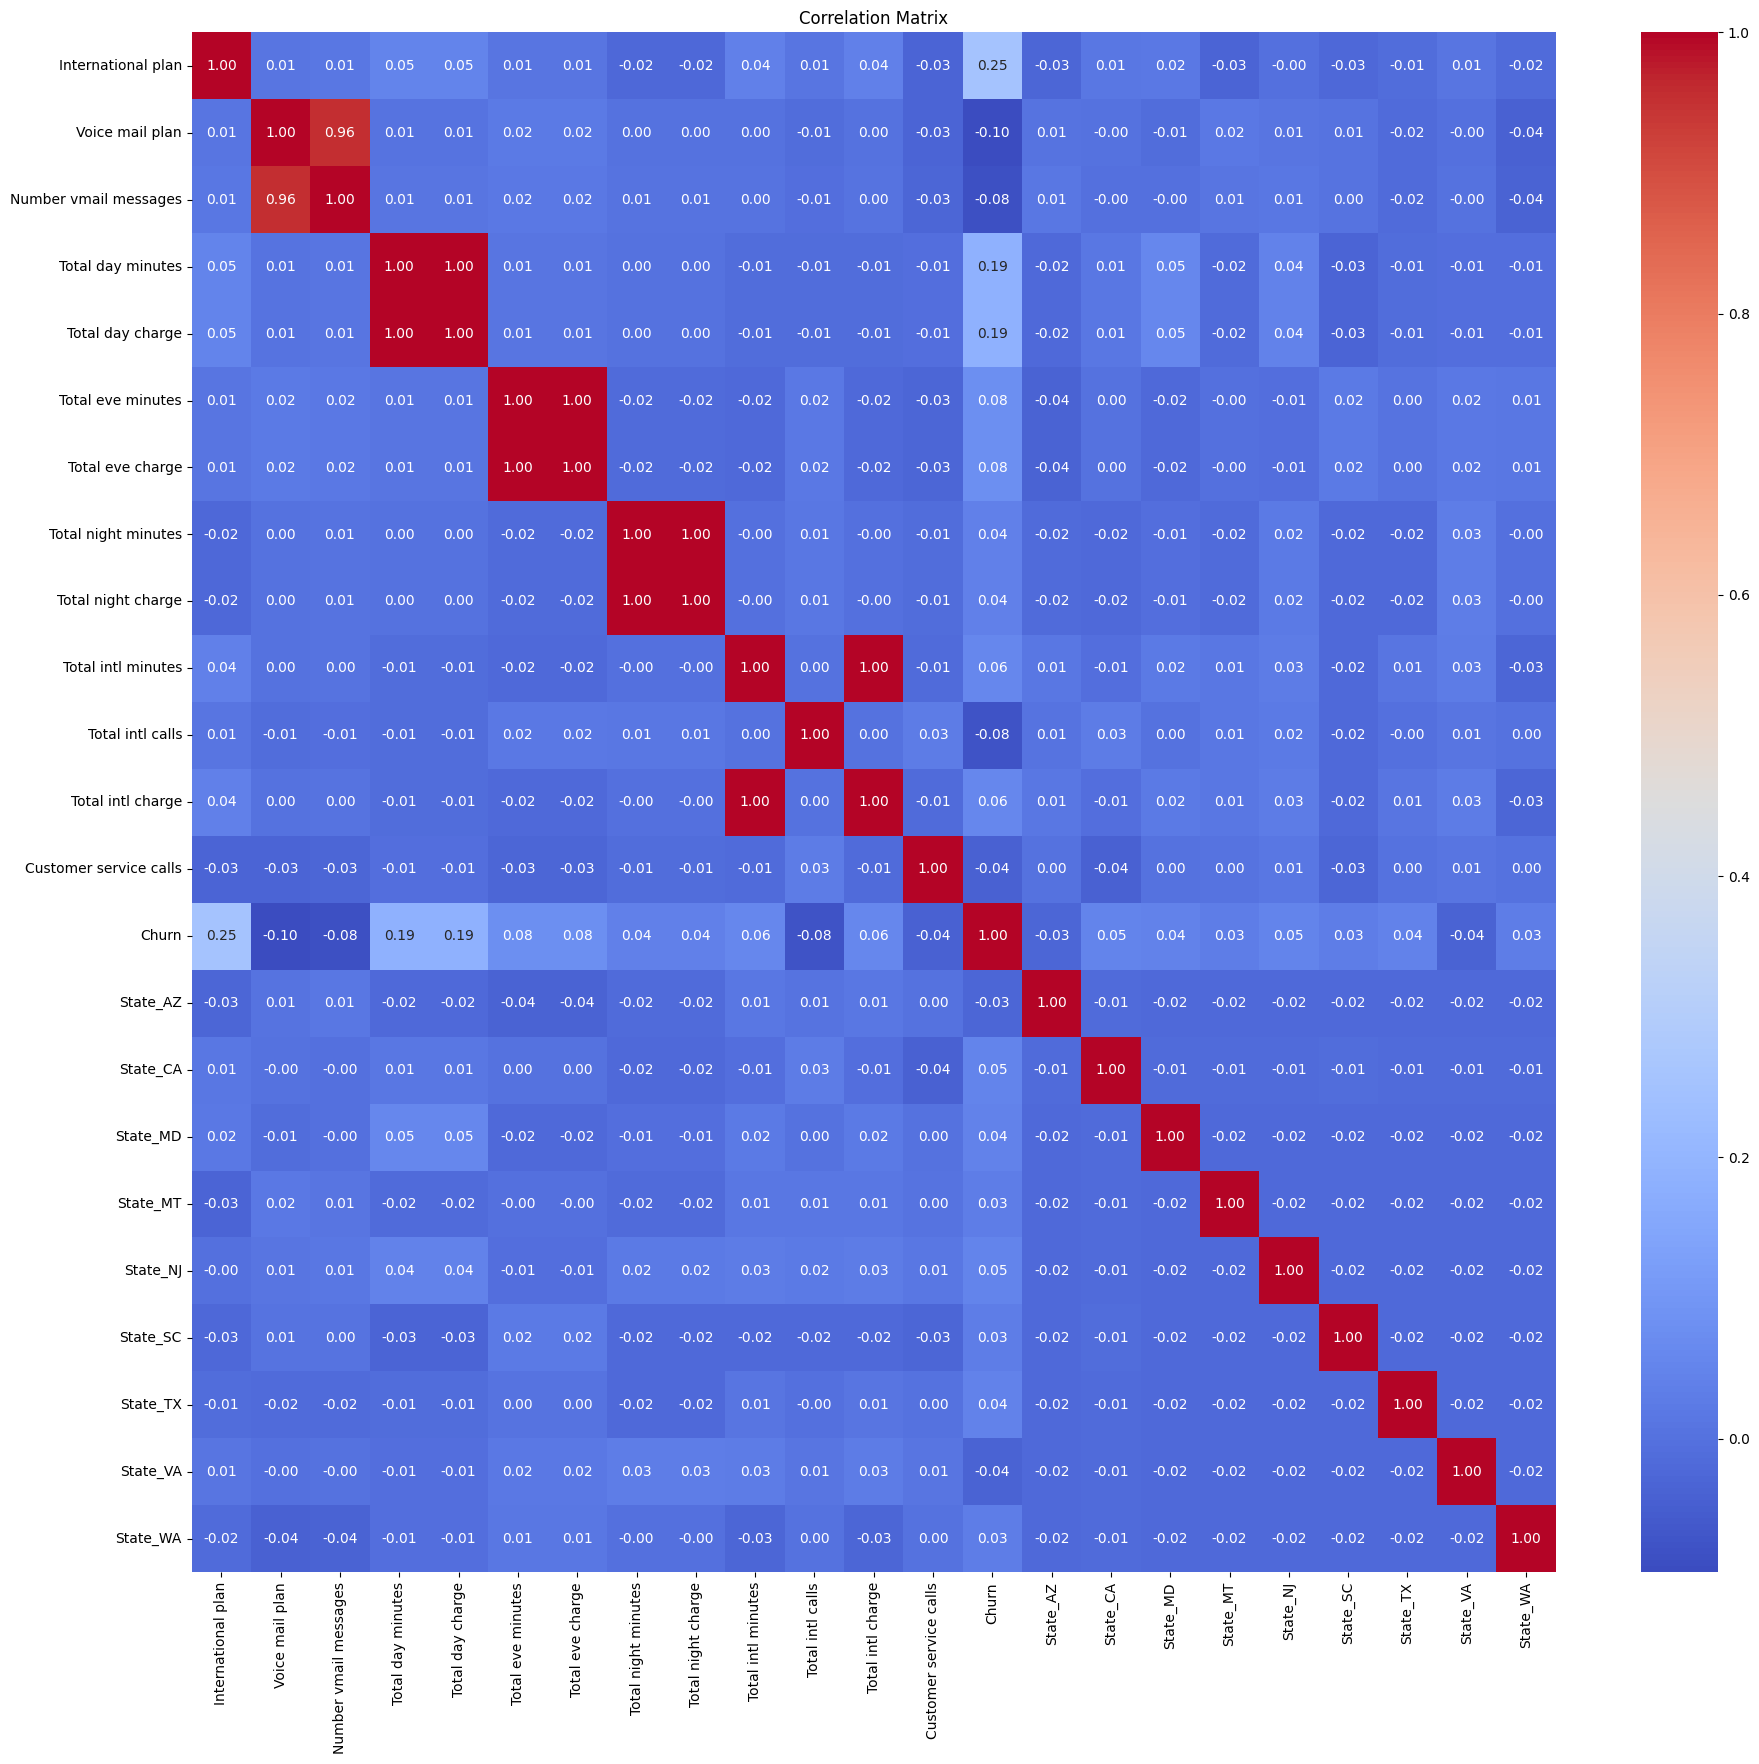

In [22]:
plt.figure(figsize=(22, 20))
correlation_matrix = combined_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Drop the specified columns
columns_to_drop = ['Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
combined_df_cleaned = combined_df_cleaned.drop(columns=columns_to_drop, errors='ignore')


***Heavily correlated columns removed***

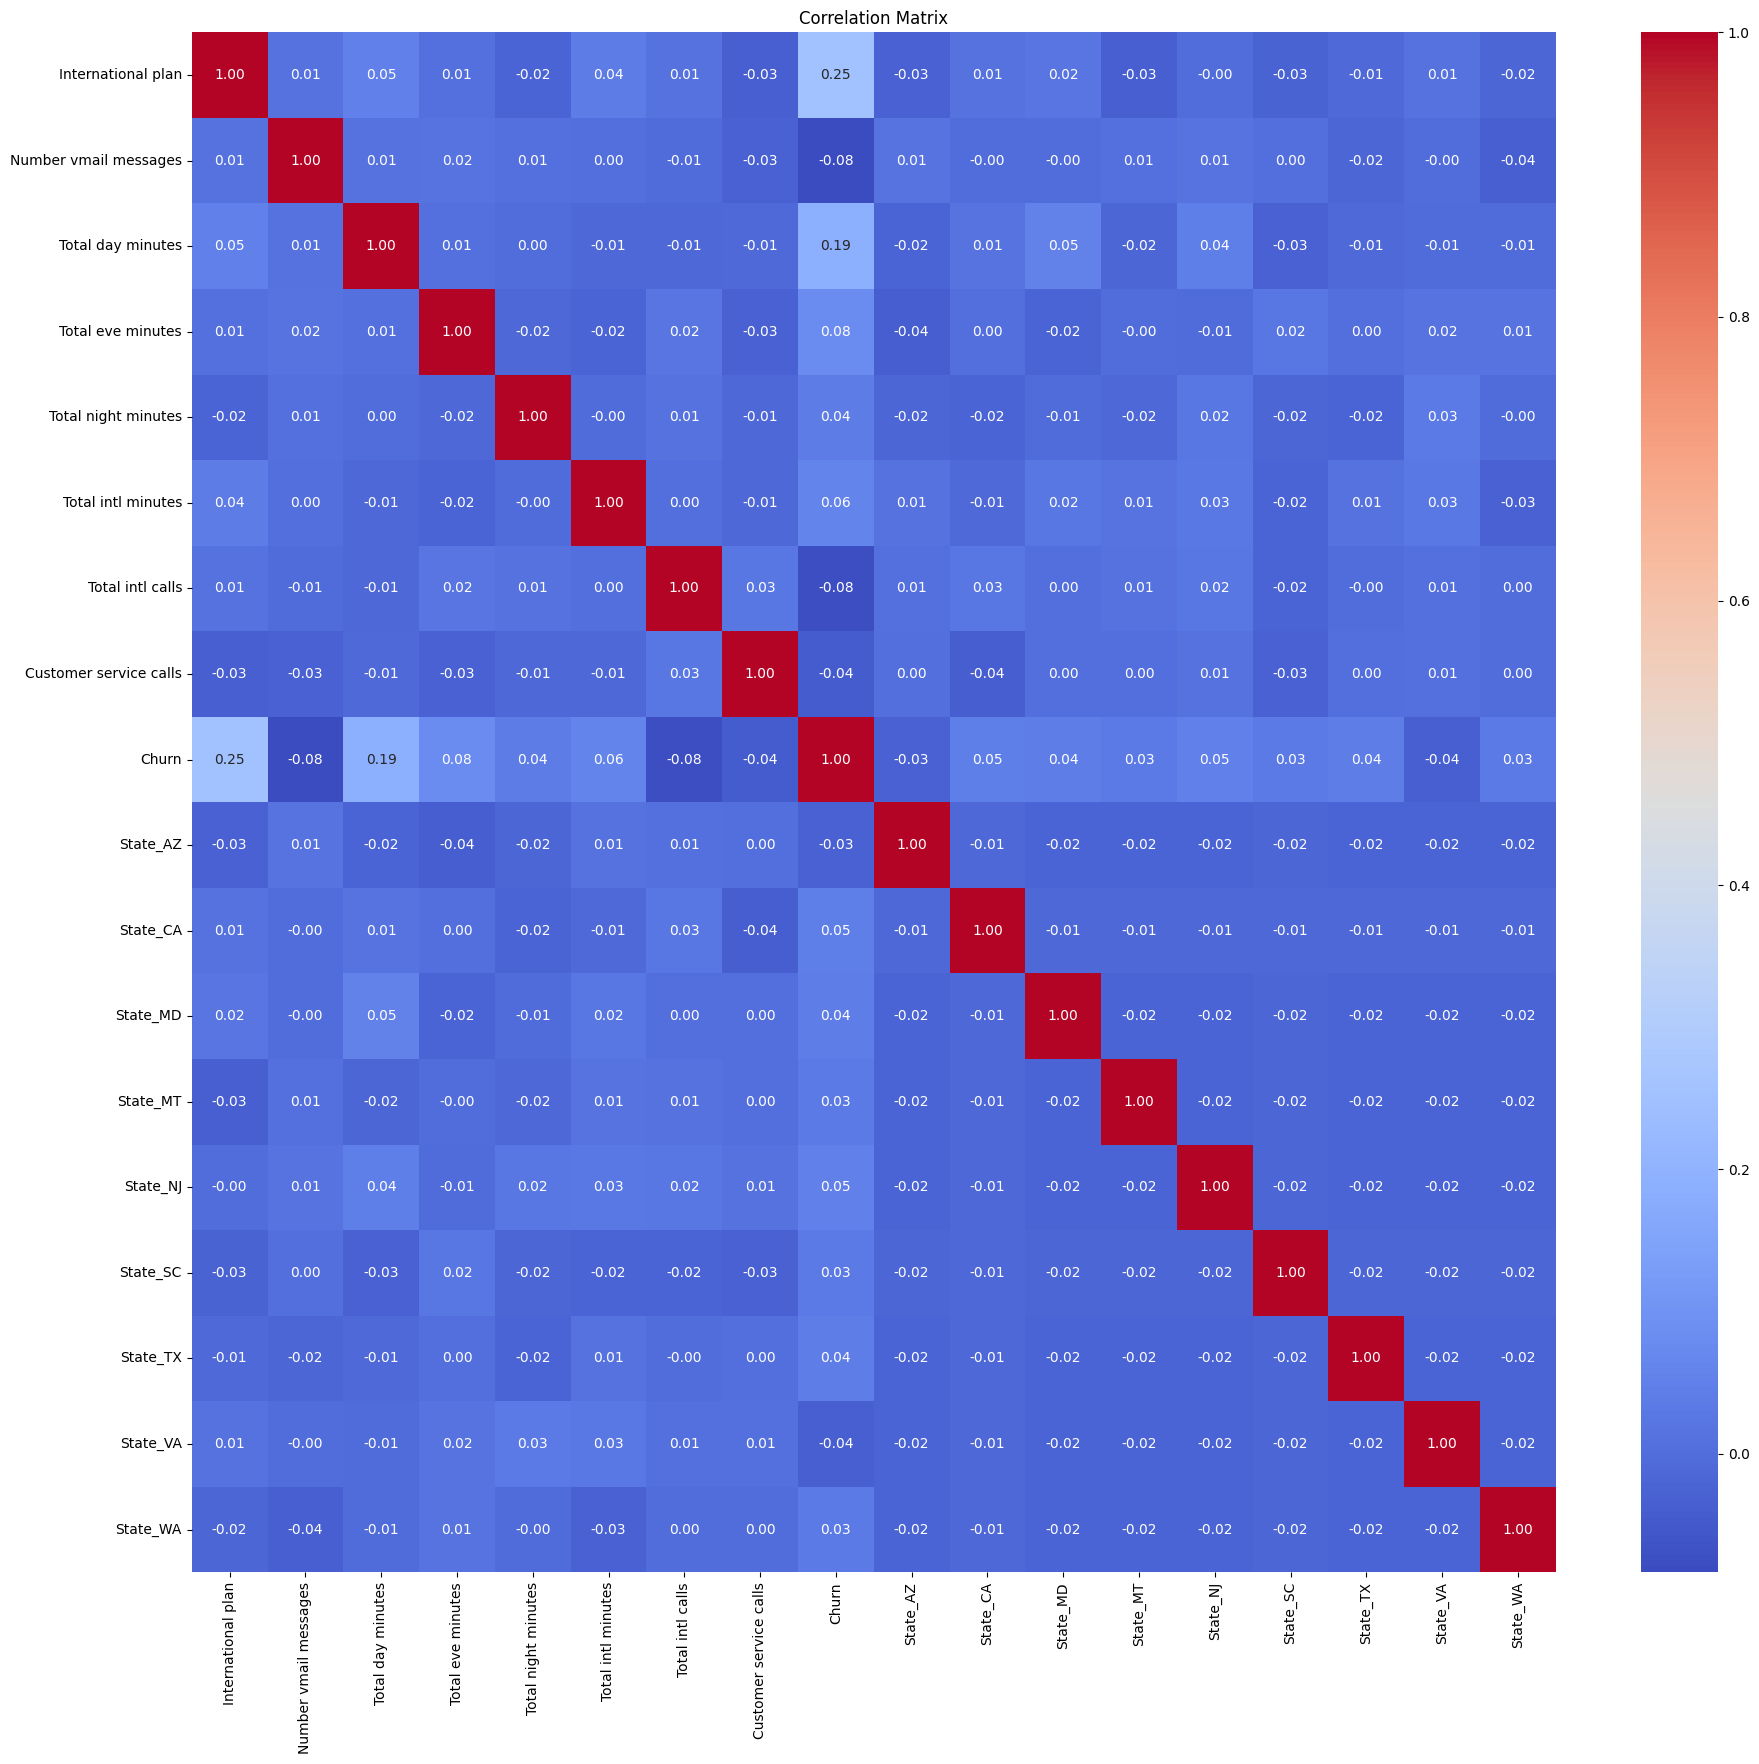

In [24]:
plt.figure(figsize=(22, 20))
correlation_matrix = combined_df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data Balancing

### Testing

In [25]:
print(combined_df_cleaned['Churn'].value_counts())

Churn
0    2619
1     434
Name: count, dtype: int64


***The Churn Column is unbalanced***

### Balancing the Data Set

In [26]:
X = combined_df_cleaned.drop('Churn', axis=1)  # Features
y = combined_df_cleaned['Churn']  # Target

# Apply SMOTE for oversampling on the entire dataset (before splitting)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Apply Edited Nearest Neighbours for undersampling
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_smote, y_smote)

# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Display the shape of the resulting splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (3788, 17), (3788,)
Testing set shape: (947, 17), (947,)


## Standardization

In [27]:
# Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data

## PCA

### Applying PCA

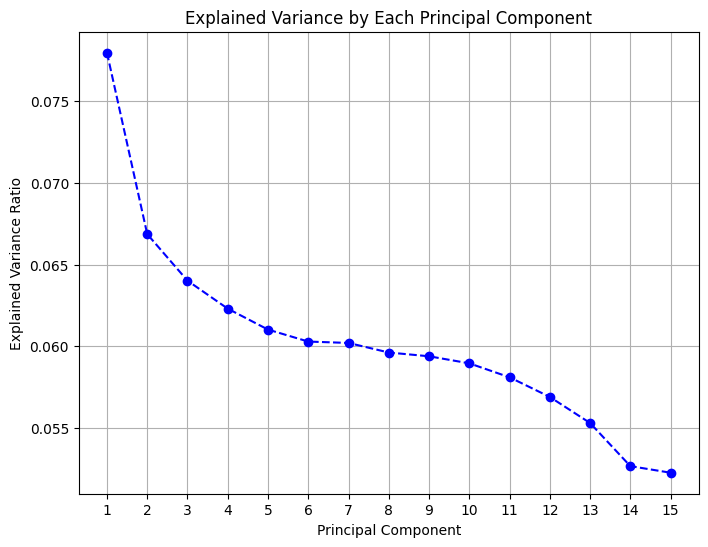

Number of variables left after PCA: 15


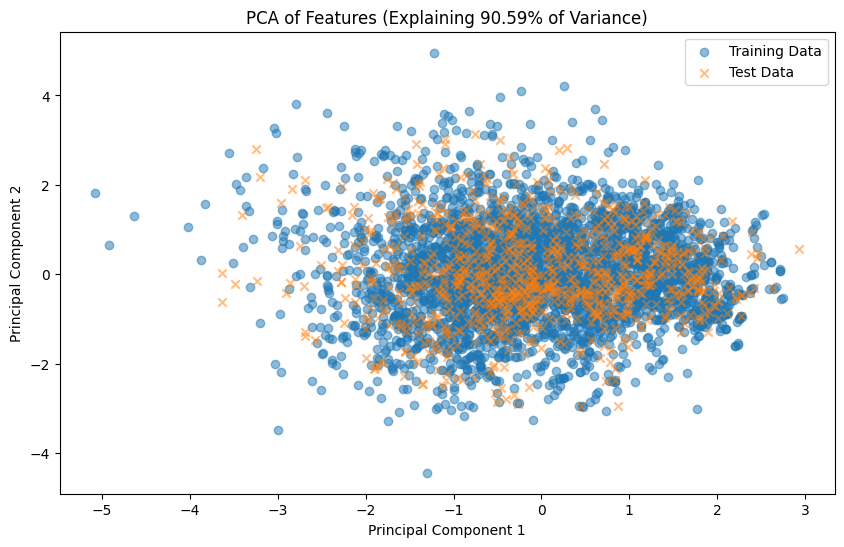

In [28]:
# PCA for dimensionality reduction (retain 80% of variance)
pca = PCA(n_components=0.9, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit and transform on training data
X_test_pca = pca.transform(X_test_scaled)       # Only transform on test data

# Variation Plot (Explained Variance Plot)
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title("Explained Variance by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# Display the number of variables (principal components) after PCA
print("Number of variables left after PCA:", pca.n_components_)

# Plot PCA results
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, label='Training Data')

# Scatter plot for test data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.5, label='Test Data', marker='x')

# Add title and labels
plt.title(f"PCA of Features (Explaining {round(pca.explained_variance_ratio_.sum() * 100, 2)}% of Variance)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


***We are left with 15 features***

### Quantitative Analysis and Visualization of Resampled Data


Feature Statistics Comparison:
                        Original Mean  Original Std  Resampled Mean  \
International plan           0.096299      0.295049        0.083421   
Number vmail messages        8.130691     13.714617        6.618374   
Total day minutes          179.869669     52.789826      193.869793   
Total eve minutes          201.093449     49.113342      206.653622   
Total night minutes        200.915427     48.695169      203.204548   
Total intl minutes          10.307632      2.586664       10.406968   
Total intl calls             4.298723      2.070637        4.032101   
Customer service calls       1.279725      0.938320        1.138543   
State_AZ                     0.019653      0.138827        0.012460   
State_CA                     0.009499      0.097014        0.005491   
State_MD                     0.021618      0.145457        0.013939   
State_MT                     0.021291      0.144375        0.013728   
State_NJ                     0.021618      0.

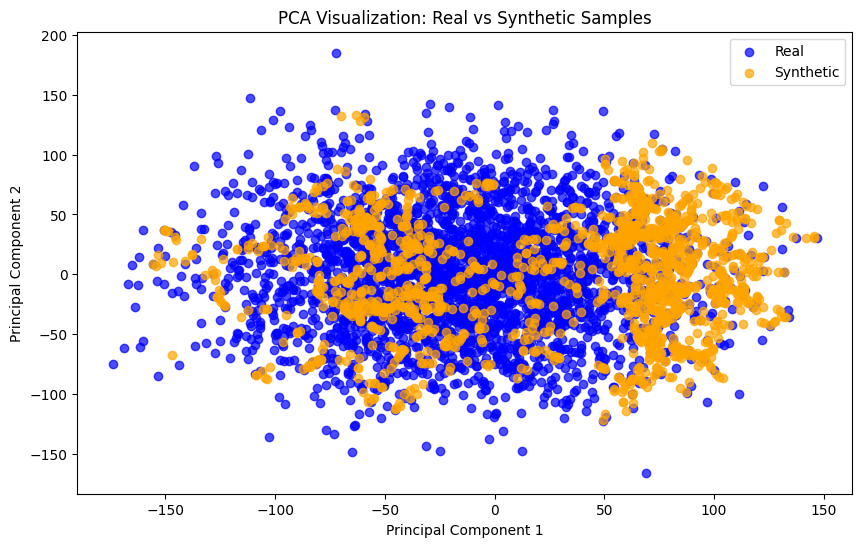

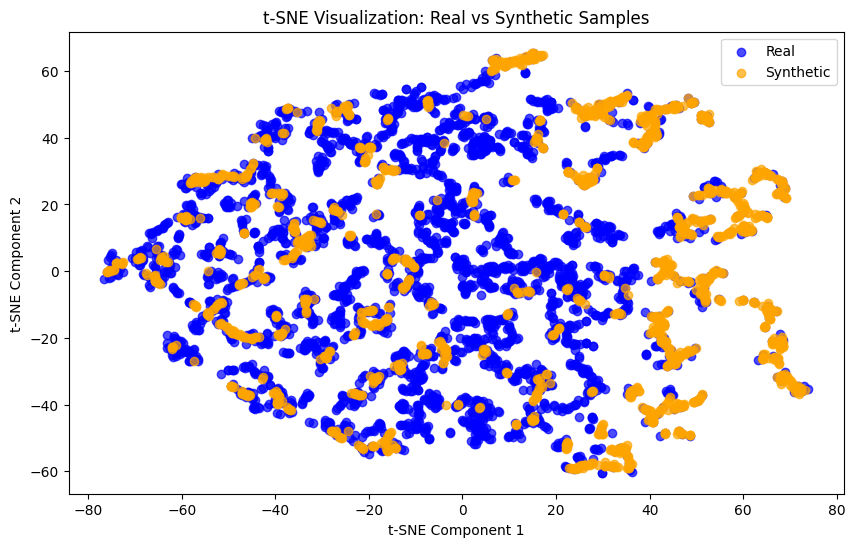

In [29]:
# Quantitative Comparison of Feature Distributions Before and After Resampling
feature_stats = pd.DataFrame({
    "Original Mean": X.mean(),
    "Original Std": X.std(),
    "Resampled Mean": X_resampled.mean(),
    "Resampled Std": X_resampled.std(),
})

print("\nFeature Statistics Comparison:")
print(feature_stats)

# PCA for Visualization of Real vs Synthetic Data
original_sample_count = len(X)
synthetic_sample_count = len(X_resampled) - original_sample_count
labels = ['Real'] * original_sample_count + ['Synthetic'] * synthetic_sample_count

# PCA Visualization
pca = PCA(n_components=2, random_state=42)
X_combined_pca = pca.fit_transform(np.vstack([X, X_resampled[original_sample_count:]]))

plt.figure(figsize=(10, 6))
for label, color in zip(['Real', 'Synthetic'], ['blue', 'orange']):
    indices = np.array(labels) == label
    plt.scatter(X_combined_pca[indices, 0], X_combined_pca[indices, 1], alpha=0.7, label=label, c=color)
plt.title("PCA Visualization: Real vs Synthetic Samples")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# t-SNE for Visualization of Real vs Synthetic Data
tsne = TSNE(n_components=2, random_state=42)
X_combined_tsne = tsne.fit_transform(np.vstack([X, X_resampled[original_sample_count:]]))

plt.figure(figsize=(10, 6))
for label, color in zip(['Real', 'Synthetic'], ['blue', 'orange']):
    indices = np.array(labels) == label
    plt.scatter(X_combined_tsne[indices, 0], X_combined_tsne[indices, 1], alpha=0.7, label=label, c=color)
plt.title("t-SNE Visualization: Real vs Synthetic Samples")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


# **Modeling**

### Random Forest

In [30]:
 #Define Random Forest and parameters
rf_model = RandomForestClassifier(random_state=42)

# Parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [10, 20, None],       # Depth of trees
    "min_samples_split": [2, 5],       # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2]         # Minimum samples required at a leaf node
}

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(
    rf_model,
    param_grid=rf_param_grid,
    cv=5,                                  # 5-fold cross-validation
    scoring="accuracy",                    # Evaluate using accuracy
    n_jobs=-1,                              # Use all available CPU cores
    verbose=2                               # Show detailed progress during the search
)

# Fit the model with grid search on the resampled training data
rf_grid_search.fit(X_train_pca, y_train)

# Get the best model after grid search
best_rf_model = rf_grid_search.best_estimator_

# Evaluate on test set
y_pred_rf = best_rf_model.predict(X_test_pca)
y_prob_rf = best_rf_model.predict_proba(X_test_pca)[:, 1]  # Get probabilities for positive class

# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       524
           1       0.91      0.82      0.86       423

    accuracy                           0.88       947
   macro avg       0.89      0.88      0.88       947
weighted avg       0.89      0.88      0.88       947





----



### Gradient Boosting

In [31]:
# Define Gradient Boosting model and parameters
gb_model = GradientBoostingClassifier(random_state=42)

# Parameter grid for Gradient Boosting (simplified)
gb_param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "learning_rate": [0.01, 0.1, 0.2],  # Step size to shrink the update
    "max_depth": [3, 5, 7]  # Maximum depth of the tree
}

# Perform Grid Search for Gradient Boosting with Cross-Validation
gb_grid_search = GridSearchCV(
    gb_model,
    param_grid=gb_param_grid,
    cv=5,                                # 5-fold cross-validation
    scoring="accuracy",                  # Evaluate using accuracy
    n_jobs=-1,                            # Use all available CPU cores
    verbose=2                             # Show detailed progress during the search
)

# Fit the model with grid search on the resampled training data
gb_grid_search.fit(X_train_pca, y_train)

# Get the best model after grid search
best_gb_model = gb_grid_search.best_estimator_

# Evaluate on the test set
y_pred_gb = best_gb_model.predict(X_test_pca)
y_prob_gb = best_gb_model.predict_proba(X_test_pca)[:, 1]  # Get probabilities for positive class

# Print classification report for Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       524
           1       0.90      0.83      0.86       423

    accuracy                           0.88       947
   macro avg       0.88      0.88      0.88       947
weighted avg       0.88      0.88      0.88       947



### SVM

In [32]:
# Define parameter grid for SVM with simplified values
param_grid = {
    'C': [1, 10,50,100,200,300],                    # Reduced range for regularization parameter
    'gamma': ['scale', 'auto'],      # Limit gamma to 'scale' and 'auto' options
    'kernel': ['rbf']                # RBF kernel, which is commonly used for SVM
}

# GridSearchCV with cross-validation
grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters :", best_params)

# Optimized model
best_svm_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_svm = best_svm_model.predict(X_test_pca)
y_prob_svm = best_svm_model.predict_proba(X_test_pca)[:, 1]  # Get probabilities for positive class

# Print classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best parameters : {'C': 300, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       524
           1       0.85      0.85      0.85       423

    accuracy                           0.86       947
   macro avg       0.86      0.86      0.86       947
weighted avg       0.86      0.86      0.86       947



### XGBoost

In [33]:
# Define the hyperparameter grid for XGBoost with simplified values
xgb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric="logloss"),
    param_grid=xgb_param_grid,
    cv=5,                                  # 5-fold cross-validation
    scoring="accuracy",                    # Evaluate using accuracy
    n_jobs=-1,                              # Use all available CPU cores
    verbose=2                               # Show detailed progress during the search
)

# Perform the grid search
xgb_grid_search.fit(X_train_pca, y_train)

# Get the best parameters and the best model
print("Best parameters:", xgb_grid_search.best_params_)
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_xgb = best_xgb_model.predict(X_test_pca)
y_prob_xgb = best_xgb_model.predict_proba(X_test_pca)[:, 1]  # Get probabilities for positive class

# Print classification report for the optimized XGBoost model
print("\nOptimized XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}

Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       524
           1       0.90      0.85      0.87       423

    accuracy                           0.89       947
   macro avg       0.89      0.88      0.89       947
weighted avg       0.89      0.89      0.89       947



### Models Comparison

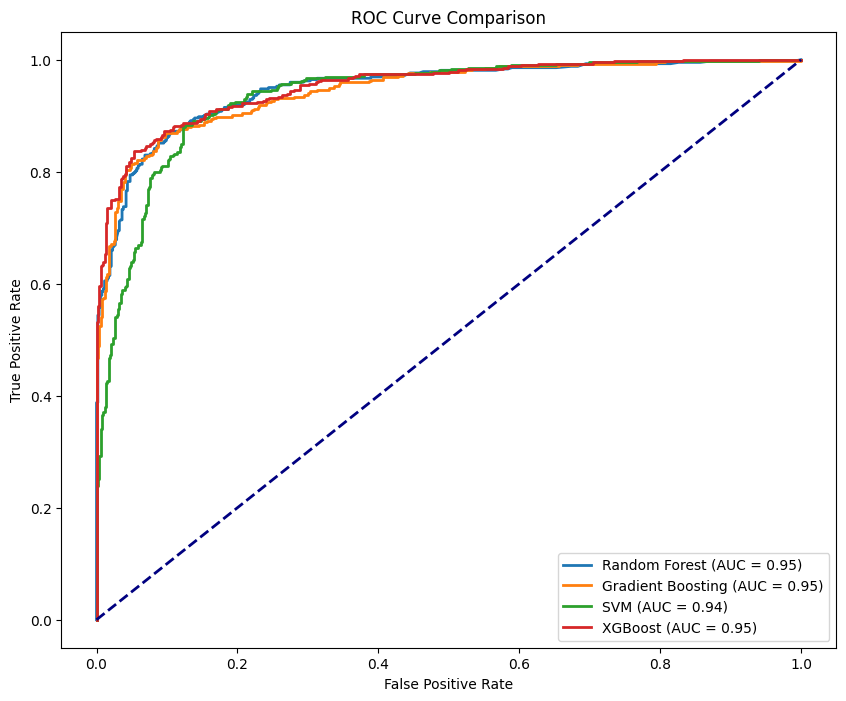

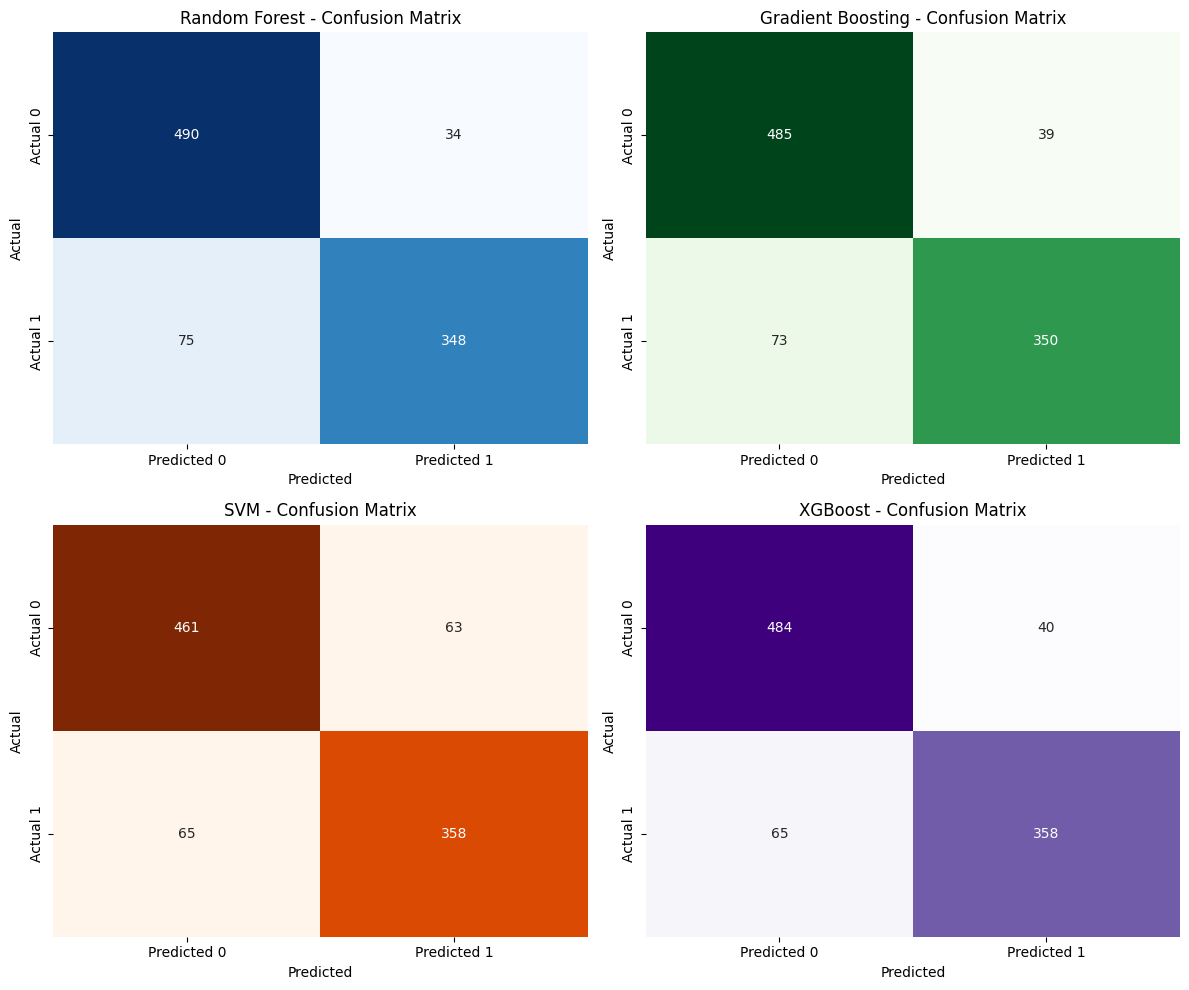


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       524
           1       0.91      0.82      0.86       423

    accuracy                           0.88       947
   macro avg       0.89      0.88      0.88       947
weighted avg       0.89      0.88      0.88       947


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       524
           1       0.90      0.83      0.86       423

    accuracy                           0.88       947
   macro avg       0.88      0.88      0.88       947
weighted avg       0.88      0.88      0.88       947


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       524
           1       0.85      0.85      0.85       423

    accuracy                           0.86       947
   macro avg       0

In [35]:
# Add XGBoost to the models dictionary
models = {
    "Random Forest": (y_test, y_prob_rf, y_pred_rf),
    "Gradient Boosting": (y_test, y_prob_gb, y_pred_gb),
    "SVM": (y_test, y_prob_svm, y_pred_svm),
    "XGBoost": (y_test, y_prob_xgb, y_pred_xgb)  
}

# ROC Curve Comparison
plt.figure(figsize=(10, 8))

# Iterate through models to plot ROC curve
for model_name, (y_true, y_prob, _) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix Comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust size for 4 models

colors = ['Blues', 'Greens', 'Oranges', 'Purples']

# Iterate through models to plot confusion matrix
for i, (model_name, (y_true, _, y_pred)) in enumerate(models.items()):
    cm = confusion_matrix(y_true, y_pred)
    ax = axes[i // 2, i % 2]  # Determine position in the 2x2 grid
    sns.heatmap(cm, annot=True, fmt='d', cmap=colors[i], cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'], ax=ax)
    ax.set_title(f"{model_name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Print Classification Reports for all models
for model_name, (y_true, _, y_pred) in models.items():
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
